Text Mining & Image Recognition  
Ramiro Wong  
23000952

# Laboratorio #2

In [20]:
# cargamos librerías 
import cv2 
import numpy as np
import matplotlib.pyplot as plt

### Problema 1

In [21]:
img = cv2.imread("imagen_ejemplo.jpg") # cargamos imagen, recordar que carga en BGR
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB) # convertimos imagen a formato RGB

In [22]:
def binarizacion(img, lim=127):
    alto = img.shape[0]
    ancho = img.shape[1]

    img_binarizada = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel = img[i, j]

            blue = pixel[2]
            green = pixel[1]
            red = pixel[0]
            
            gris = (0.3*red + 0.59*green + 0.11*blue) # escala de grises ponderada

            if gris > lim:
                img_binarizada[i, j] = 255 
            else:
                img_binarizada[i, j] = 0 
    
    return img_binarizada

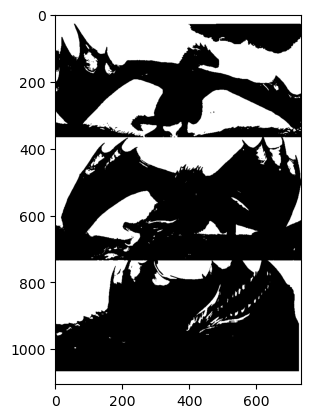

In [23]:
prueba_binarizacion = binarizacion(img, 127)
plt.imshow(prueba_binarizacion, cmap="gray")
plt.show()

### Problema 2

In [27]:
def operaciones_dos_img(img1, img2, lim=127):
    alto = img1.shape[0]
    ancho = img1.shape[1]

    img_binarizada1 = np.zeros((alto, ancho, 1))
    img_binarizada2 = np.zeros((alto, ancho, 1))

    operacion_and = np.zeros((alto, ancho, 1))
    operacion_or = np.zeros((alto, ancho, 1))
    operacion_xor = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            pixel1 = img1[i, j]
            pixel2 = img2[i, j]

            blue1 = pixel1[2]
            green1 = pixel1[1]
            red1 = pixel1[0]

            blue2 = pixel2[2]
            green2 = pixel2[1]
            red2 = pixel2[0]
            
            gris1 = (0.3*red1 + 0.59*green1 + 0.11*blue1) # escala de grises ponderada
            gris2 = (0.3*red2 + 0.59*green2 + 0.11*blue2)

            # binarizacion imagen 1
            if gris1 > lim:
                img_binarizada1[i, j] = 255 
            else:
                img_binarizada1[i, j] = 0 
            
            # binarizacion imagen 2
            if gris2 > lim:
                img_binarizada2[i, j] = 255 
            else:
                img_binarizada2[i, j] = 0

            # operaciones logicas: OR
            if img_binarizada1[i, j] == 255 or img_binarizada2[i, j] == 255:
                operacion_or[i, j] = 255
            else:
                operacion_or[i, j] = 0

            # operaciones logicas: AND
            if img_binarizada1[i, j] == 255 and img_binarizada2[i, j] == 255:
                operacion_and[i, j] = 255
            else:
                operacion_and[i, j] = 0

            # operaciones logicas: XOR
            if img_binarizada1[i, j] == 255 and img_binarizada2[i, j] == 0:
                operacion_xor[i, j] = 255
            if img_binarizada1[i, j] == 0 and img_binarizada2[i, j] == 255:
                operacion_xor[i, j] = 255
            else:
                operacion_xor[i, j] = 0

    operacion_suma = cv2.add(img1, img2)    
    operacion_resta = cv2.subtract(img1, img2)    

    return operacion_suma, operacion_resta, operacion_or, operacion_and, operacion_xor

In [29]:
img1 = cv2.imread("img1.jpeg") 
img2 = cv2.imread("img2.jpg") 
img1 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 
img2 = cv2.cvtColor(img1, cv2.COLOR_BGR2RGB) 

In [30]:
img_suma, img_resta, img_or, img_and, img_xor = operaciones_dos_img(img1, img2)

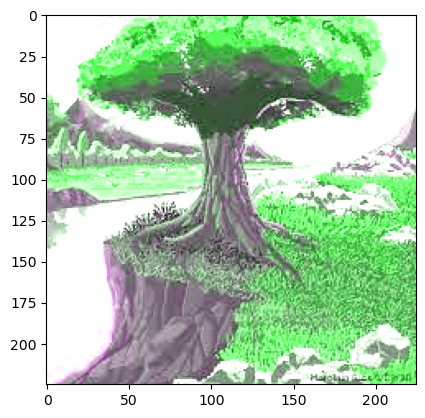

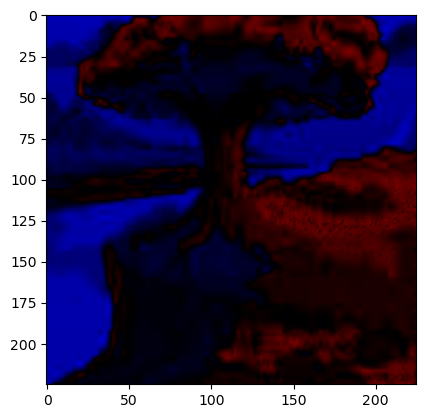

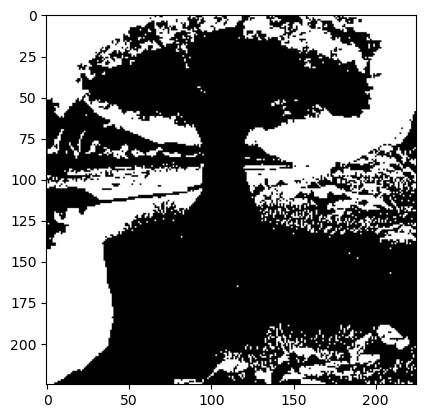

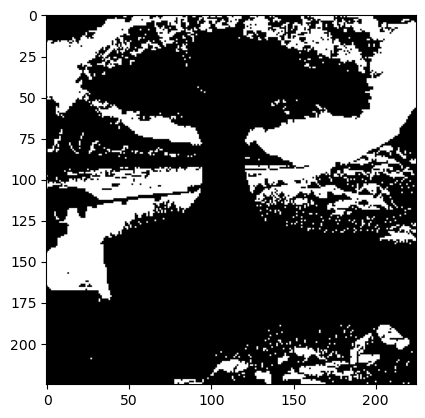

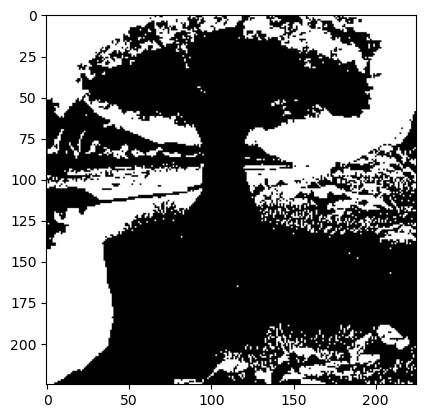

In [31]:
plt.imshow(img_suma, cmap="gray")
plt.show()

plt.imshow(img_resta, cmap="gray")
plt.show()

plt.imshow(img_or, cmap="gray")
plt.show()

plt.imshow(img_and, cmap="gray")
plt.show()

plt.imshow(img_or, cmap="gray")
plt.show()

### Problema 3

In [46]:
img_gris = cv2.imread("img2.jpg", cv2.IMREAD_GRAYSCALE)

In [53]:
def gris_3D(img):
    # Obtener las dimensiones de la imagen
    filas, columnas = img.shape

    # Crear una malla de coordenadas X e Y
    X, Y = np.meshgrid(np.arange(columnas), np.arange(filas))

    Z = img

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    ax.plot_surface(X, Y, Z, cmap='gray')

    plt.show()

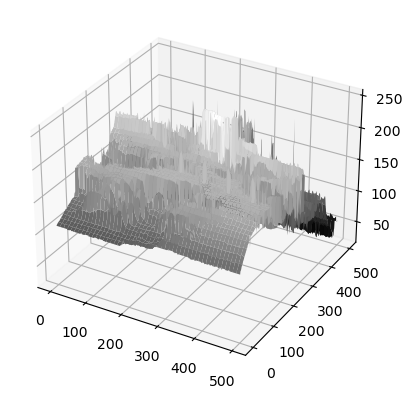

In [54]:
gris_3D(img_gris)

### Problema 5

#### Negativa

In [57]:
def transformacion_negativa(img):
    alto = img.shape[0]
    ancho = img.shape[1]

    img_negativa = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            img_negativa[i, j] = 255 - img[i, j]
    
    return img_negativa

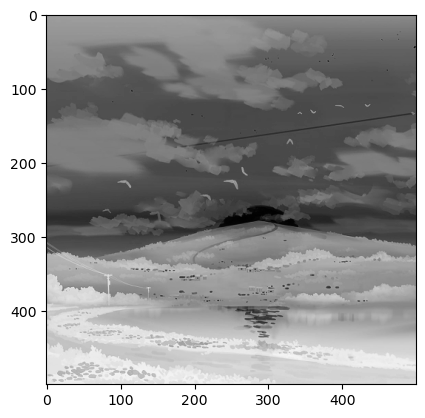

In [58]:
img_negativa = transformacion_negativa(img_gris)
plt.imshow(img_negativa, cmap="gray")
plt.show()

#### Lineal

In [59]:
def transformacion_lineal(img, alfa, beta):
    alto = img.shape[0]
    ancho = img.shape[1]

    img_lineal = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            img_lineal[i, j] = alfa*img[i, j] + beta
    
    return img_lineal

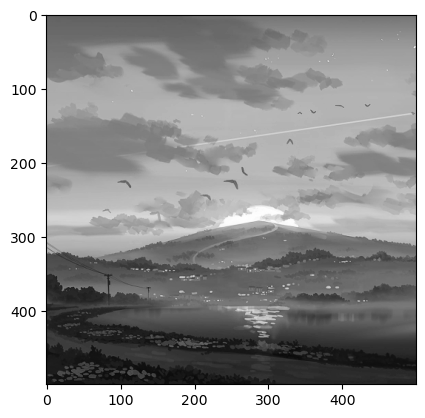

In [60]:
img_lineal = transformacion_lineal(img_gris, 0.5, 50)
plt.imshow(img_lineal, cmap="gray")
plt.show()

#### Logarítmica

In [61]:
def transformacion_log(img, alfa):
    alto = img.shape[0]
    ancho = img.shape[1]

    img_log = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            img_log[i, j] = alfa*np.log(1 + img[i, j])
    
    return img_log

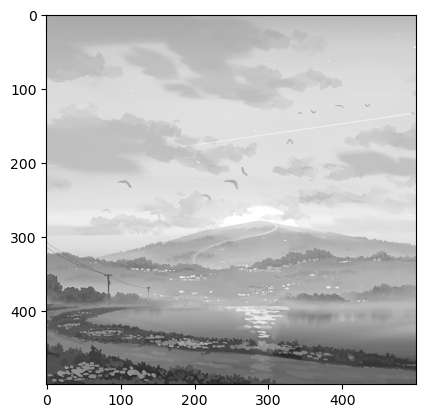

In [62]:
img_log = transformacion_log(img_gris, 5)
plt.imshow(img_log, cmap="gray")
plt.show()

#### Exponencial


In [63]:
def transformacion_exp(img, alfa, exp):
    alto = img.shape[0]
    ancho = img.shape[1]

    img_exp = np.zeros((alto, ancho, 1))

    for i in range(0, alto):
        for j in range(0, ancho):
            r_norm = img[i, j] / 255
            img_exp[i, j] = alfa*np.power(r_norm, exp)
    
    return img_exp

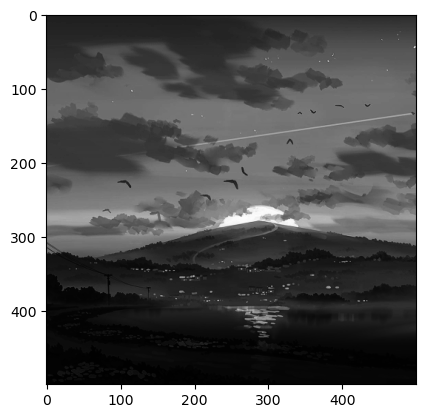

In [64]:
img_exp = transformacion_exp(img_gris, 10, 2.5)
plt.imshow(img_exp, cmap="gray")
plt.show()

### Problema 5

Investigue que hace el kernel Laplaceano y como este enfoque se diferencia de usar el algoritmo de
Canny para la detección de bordes.

RESPUESTA:  
Tanto el kernel Laplaceano y el algoritmo de Canny son técnicas usadas para detectar borde en imágenes, aunque funcionana de forma diferente. En el algoritmo de Canny, se detectan cambios en la intensidad al identificar cambios bruscos en la primera derivada.   
  
Tiene tres pasos generales:  
* Obtención  del  gradiente:  en este paso  se  calcula  la magnitud y  orientación  del vector gradiente en cada píxel. 
* Supresión no máxima: en este paso se logra el adelgazamiento del ancho de los bordes, obtenidos con el gradiente, hasta lograr bordes de un píxel de ancho.
* Histéresis  de  umbral:  en  este paso  se  aplica una  función de  histéresis  basada en  dos umbrales; con este proceso se pretende reducir la posibilidad de aparición de contornos falsos. 
  
El Laplaceano, en cambio, es una medición de la segunda derivada espacial de la imagen. Detecta bordes por medio de cambios bruscos en la intensidad. Suelen usarse con imágenes que han pasado un suavizado (Gaussiano, por ejemplo). Para aproximar los valores de la derivada, suelen utilizarse kernels

Referencias:  
* Valverde-Rebaza, J. (2007). "Detección de bordes mediante el algoritmo de Canny". Universidad Nacional de Trujillo.  
* R. Fisher, S. Perkins, A. Walker and E. Wolfart. (2003) "Laplacian/Laplacian of Gaussian" En: https://homepages.inf.ed.ac.uk/rbf/HIPR2/log.htm* [consultado el 11/8/2024]